## Практическая работа 5

## 1 Найти данные для классификации. Данные в группе повторяться не должны. Предобработать данные, если это необходимо

In [48]:
import pandas as pd
import os

PATH = '/Users/naverigin/PycharmProjects/MireaBigData/pr4/'
file_path = os.path.join(PATH, 'smartphones.csv')

data = pd.read_csv(file_path, sep=",")
data.info()
data.drop(["brand_name", "model", "fast_charging", "processor_brand", "os"], axis=1, inplace=True)
data.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 941 non-null    object 
 1   model                      941 non-null    object 
 2   price                      941 non-null    int64  
 3   avg_rating                 842 non-null    float64
 4   5G_or_not                  941 non-null    int64  
 5   processor_brand            922 non-null    object 
 6   num_cores                  935 non-null    float64
 7   processor_speed            899 non-null    float64
 8   battery_capacity           930 non-null    float64
 9   fast_charging_available    941 non-null    int64  
 10  fast_charging              741 non-null    float64
 11  ram_capacity               941 non-null    int64  
 12  internal_memory            941 non-null    int64  
 13  screen_size                941 non-null    float64

## 2 Изобразить гистограмму, которая показывает баланс классов. Сделать выводы

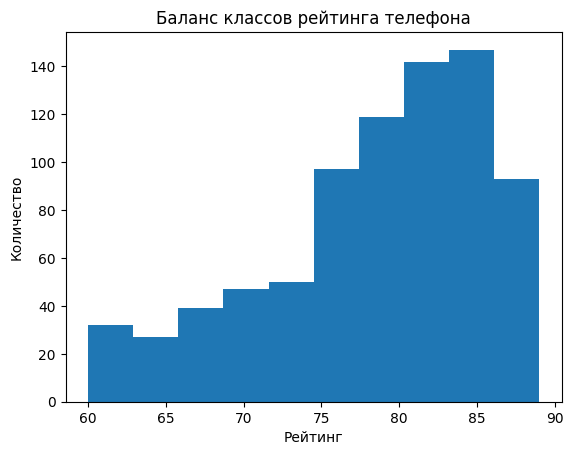

In [49]:
import matplotlib.pyplot as plt

data['avg_rating'] = data['avg_rating'].multiply(10)
plt.hist(x=data["avg_rating"])
plt.title("Баланс классов рейтинга телефона")
plt.ylabel("Количество")
plt.xlabel("Рейтинг")
plt.show()

## 3 Разбить выборку на тренировочную и тестовую. Тренировочная для обучения модели, тестовая для проверки ее качества

In [50]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


predictors = data.copy().drop("avg_rating", axis=1)
target = data["avg_rating"]
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=123)

print(f"Размер для обучающей выборки:{x_train.shape}")
print(f"Размер для признаков тестовой выборки:{x_test.shape}")
print(f"Размер для целевого показателя обучающей выборки:{y_train.shape}")
print(f"Размер для показателя тестовой выборки:{y_test.shape}")

Размер для обучающей выборки:(634, 16)
Размер для признаков тестовой выборки:(159, 16)
Размер для целевого показателя обучающей выборки:(634,)
Размер для показателя тестовой выборки:(159,)


## 4 Применить алгоритмы классификации: логистическая регрессия, SVM, KNN. Построить матрицу ошибок по результатам работы моделей (использовать confusion_matrix из sklearn.metrics)

In [51]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns


def show__matrix(name, confusion_matrix):
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5)
    plt.title(f'{name} - матрица ошибок')
    plt.xlabel('Предсказанные классы')
    plt.ylabel('Настоящие классы')
    plt.show()

/Users/naverigin/PycharmProjects/MireaBigData/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


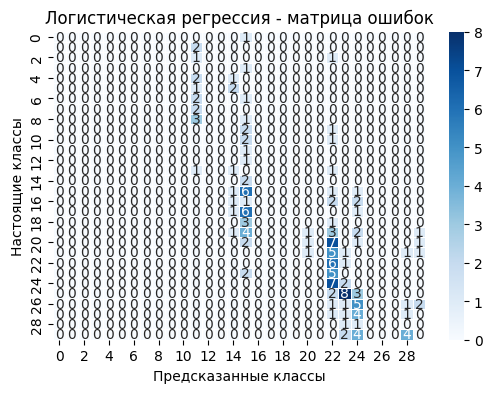

In [52]:
# Логистическая регрессия
lr_model = LogisticRegression(random_state=123)
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
lr_confusion_matrix = confusion_matrix(y_test, lr_pred)
show__matrix('Логистическая регрессия', lr_confusion_matrix)

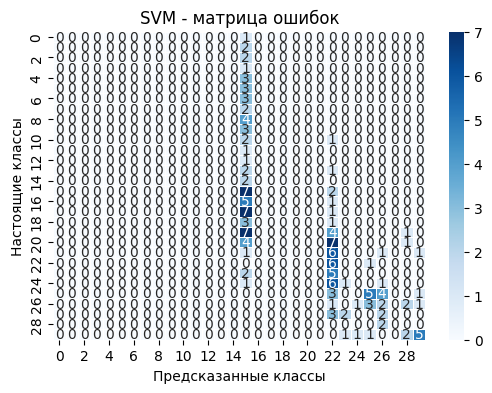

In [53]:
# SVM
svm_model = SVC()
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)
svm_confusion_matrix = confusion_matrix(y_test, svm_pred)
show__matrix('SVM', svm_confusion_matrix)

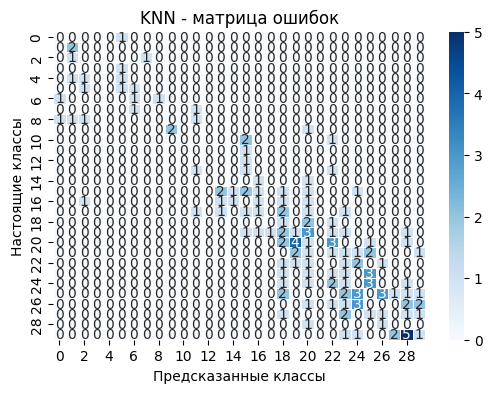

In [54]:
# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)
knn_confusion_matrix = confusion_matrix(y_test, knn_pred)
show__matrix('KNN', knn_confusion_matrix)

## 5 Сравнить результаты классификации, используя accuracy, precision, recall и f1-меру (можно использовать classification_report из sklearn.metrics). Сделать выводы

In [55]:
from sklearn.metrics import classification_report

print('Логистическая регрессия')
print(classification_report(lr_pred, y_test))

print('SVM')
print(classification_report(svm_pred, y_test))

print('KNN')
print(classification_report(knn_pred, y_test))


Логистическая регрессия
              precision    recall  f1-score   support

        60.0       0.00      0.00      0.00         0
        61.0       0.00      0.00      0.00         0
        62.0       0.00      0.00      0.00         0
        63.0       0.00      0.00      0.00         0
        64.0       0.00      0.00      0.00         0
        65.0       0.00      0.00      0.00         0
        66.0       0.00      0.00      0.00         0
        67.0       0.00      0.00      0.00         0
        68.0       0.00      0.00      0.00         0
        69.0       0.00      0.00      0.00         0
        70.0       0.00      0.00      0.00         0
        71.0       0.00      0.00      0.00        14
        72.0       0.00      0.00      0.00         0
        73.0       0.00      0.00      0.00         0
        74.0       0.00      0.00      0.00         8
        75.0       0.67      0.17      0.27        36
        76.0       0.00      0.00      0.00         0
   

/Users/naverigin/PycharmProjects/MireaBigData/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/naverigin/PycharmProjects/MireaBigData/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/naverigin/PycharmProjects/MireaBigData/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif